In [1]:
import numpy as np
import keras as kr
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
batch_size = 128
epochs = 20
num_classes = 10

In [3]:
(x_train, y_train), (x_test, y_test) = kr.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


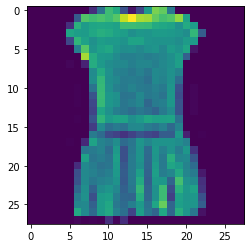

In [4]:
plt.imshow(x_train[3])

In [0]:
xtrain = x_train.reshape(60000,784)
xtest = x_test.reshape(10000,784)

In [0]:
xtrain = xtrain.astype("float32")
xtest = xtest.astype("float32")

In [0]:
xtrain = xtrain/255
xtest = xtest/255

In [0]:
ytrain = kr.utils.to_categorical(y_train)
ytest = kr.utils.to_categorical(y_test)

In [11]:
ytrain[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [13]:
ytrain.shape

(60000, 10)

In [0]:
model  = kr.models.Sequential()
model.add(kr.layers.Dense(512 ,activation="sigmoid" , input_shape=(784,)))
model.add(kr.layers.Dense(512 , activation="sigmoid" ))
model.add(kr.layers.Dense(10, activation="softmax" ))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer="adam" , loss="categorical_crossentropy" , metrics=["accuracy"])

In [23]:
hist = model.fit(xtrain , ytrain , epochs=epochs , batch_size=batch_size )

Epoch 1/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.3313 - accuracy: 0.8788
Epoch 2/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.3115 - accuracy: 0.8849
Epoch 3/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.2987 - accuracy: 0.8906
Epoch 4/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.2853 - accuracy: 0.8948
Epoch 5/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.2722 - accuracy: 0.8984
Epoch 6/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.2634 - accuracy: 0.9018
Epoch 7/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.2498 - accuracy: 0.9065
Epoch 8/20
60000/60000 [==============================] - 8s 125us/step - loss: 0.2434 - accuracy: 0.9073
Epoch 9/20
60000/60000 [==============================] - 7s 122us/step - loss: 0.2311 - accuracy: 0.9136
Epoch 10/20
60000/60000 [=====================

In [0]:
model.save("model.h5")

In [0]:
model.load_weights("model.h5")

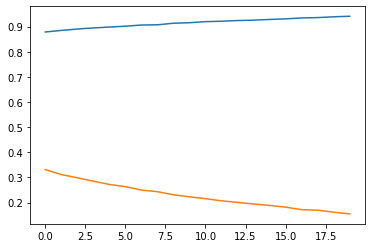

In [26]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["loss"])